We first install kaggle

In [ ]:
pip install kaggle

We then import kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download danielgrijalvas/movies

Dataset URL: https://www.kaggle.com/datasets/danielgrijalvas/movies
License(s): CC0-1.0
100% 424k/424k [00:00<00:00, 1.09MB/s]
100% 424k/424k [00:00<00:00, 1.09MB/s]


unzipping the folder


In [6]:
!unzip /content/movies.zip

Archive:  /content/movies.zip
  inflating: movies.csv              


Importing the relevant libraries that will be used in the project

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
movies_data=pd.read_csv('/content/movies.csv')

Data Overview & Cleaning

Initial exploration to check for the first 10 rows.

In [9]:
movies_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Gives information about the rows and columns in the dataset as well as their data types.

In [10]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


Analyzes numeric as well as to object series or series of a DataFrame and check for outliers.

In [11]:
movies_data.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Used to check for missing values in the dataset

In [12]:
movies_data.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


We have several missing values in our dataset in the different variables

We are gonna handle this missing values by replacing the missing values with the median of the columns because comparing the mean and the median of most of the columns they indicate a skewness to the right meaning if we use the mean it might influence the outcome of the analysis and might not be as accurate as using the median.

In [13]:
# Imputing the missing values in 'score', 'votes', 'budget', 'gross', and 'runtime' with median
columns_to_impute = ['score', 'votes', 'budget', 'gross', 'runtime']

for col in columns_to_impute:
    median_value = movies_data[col].median()
    movies_data[col] = movies_data[col].fillna(median_value)

In [14]:
#getting the mode
rating_mode = movies_data['rating'].mode().iloc[0]
#filling for the rating column
movies_data['rating'] = movies_data['rating'].fillna(rating_mode)
#getting the mode
released_mode = movies_data['released'].mode().iloc[0]
#filling for the released column
movies_data['released'] = movies_data['released'].fillna(released_mode)
#getting the mode
writer_mode = movies_data['writer'].mode().iloc[0]
#filling for the released column
movies_data['writer'] = movies_data['writer'].fillna(writer_mode)
#getting the mode
star_mode = movies_data['star'].mode().iloc[0]
#filling for the released column
movies_data['star'] = movies_data['star'].fillna(star_mode)
#getting the mode
country_mode = movies_data['country'].mode().iloc[0]
#filling for the released column
movies_data['country'] = movies_data['country'].fillna(country_mode)
#getting the mode
company_mode = movies_data['company'].mode().iloc[0]
#filling for the released column
movies_data['company'] = movies_data['company'].fillna(company_mode)

Fillna was used to handle and fill in all missing values in the columns of the dataset

To check if we still have missing values

In [15]:
movies_data.isnull().sum()

,0
name,0
rating,0
genre,0
year,0
released,0
score,0
votes,0
director,0
writer,0
star,0


I have filled all missing values in our dataset for the numerical values I filled with the median and for the categorical columns I filled using the mode.

In [16]:
movies_data.duplicated().sum()

0

there are no duplicates in our dataset

Data Exploration and Analysis

genre
Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Adventure     427
Animation     338
Horror        322
Fantasy        44
Mystery        20
Name: count, dtype: int64


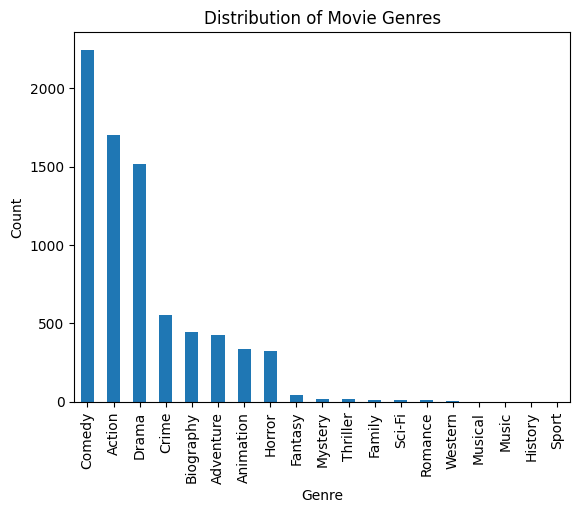

In [25]:
#Genre Analysis -here we are analyzing the distribution of movie genres and identifying popular genres over time.
genre_counts = movies_data['genre'].value_counts()

# Outputs the top 10 genres
print(genre_counts.head(10))

# Bar graph to shop n genre distribution
genre_counts.plot(kind='bar', title='Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Observations from the bar graph
- Comedy is the most popular genre, with over 2000 movies.
- Action and Drama Follow being the next most popular genres, with around 1500 and 1500 movies.
- Niche Genres: Genres like Fantasy, Mystery, Thriller, Family, Romance, Western, Music, History, and Sport have relatively low counts, suggesting they are niche genres compared to Comedy, Action, and Drama.

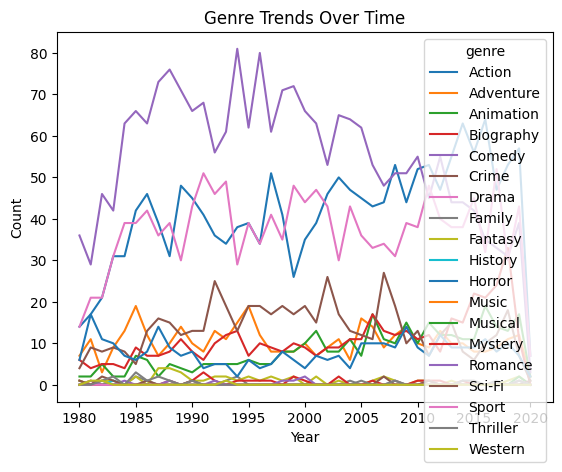

In [26]:
#pivot table to count genres by year
genre_trends = movies_data.pivot_table(
    index='year', columns='genre', aggfunc='size', fill_value=0)
# Visualize genre trends over time
figsize = (15, 8)
genre_trends.plot(kind='line', title='Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


Observations from the data
- Comedy, Action, and Drama have remained consistently popular throughout the decades.
- Adventure, Animation, and Biography have seen a significant increase in popularity, especially in recent years.
-  Crime, Family, Fantasy, History, Horror, Music, Musical, Mystery, Romance, Sci-Fi, Thriller, and Western have no constant rise or decline but generally show a decline in popularity compared to their peak periods.

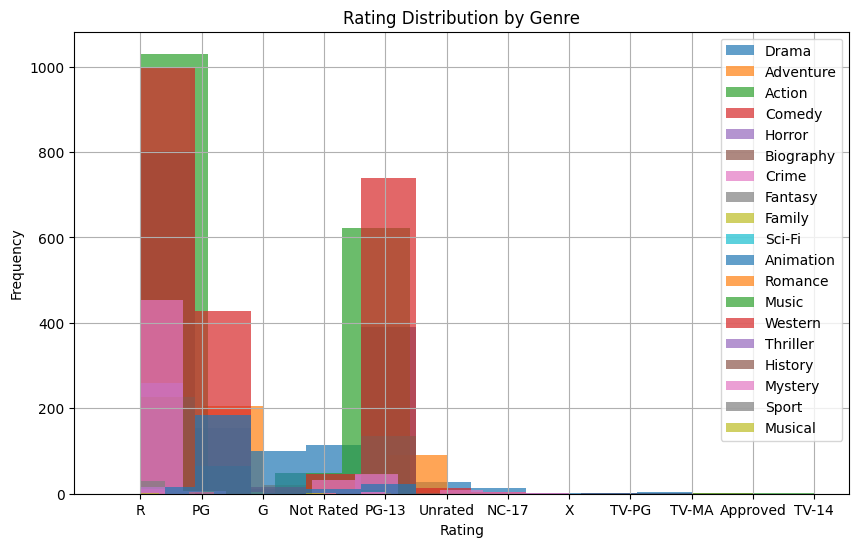

In [21]:
# Splitting genres into individual rows
movies_data_expanded = movies_data.explode('genre')

#histogram to depict the distribution of ratings across genres
for genre in movies_data_expanded['genre'].unique():
    genre_data = movies_data_expanded[movies_data_expanded['genre'] == genre]
    genre_data['rating'].hist(bins=10, alpha=0.7, label=genre)
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.title('Rating Distribution by Genre')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Observations from the histogram
- The histograms for many genres overlap, indicating that ratings are not exclusively tied to specific genres.
-  Some genres exhibit distinct rating patterns:
Like Drama has a wider range of ratings, with a significant number of higher-rated movies.More concentrated in the higher rating range, suggesting they often appeal to audiences seeking excitement and thrills.
Comedy and Family tend to have higher frequencies in the lower to mid-range ratings, possibly indicating a broader appeal to diverse audiences.
Horror and Thriller on the other hand have higher frequencies in the lower rating range, suggesting they might target specific audiences seeking intense or disturbing content.
- Most genres have a diverse range of ratings, indicating that genres are not strictly associated with particular rating categories.

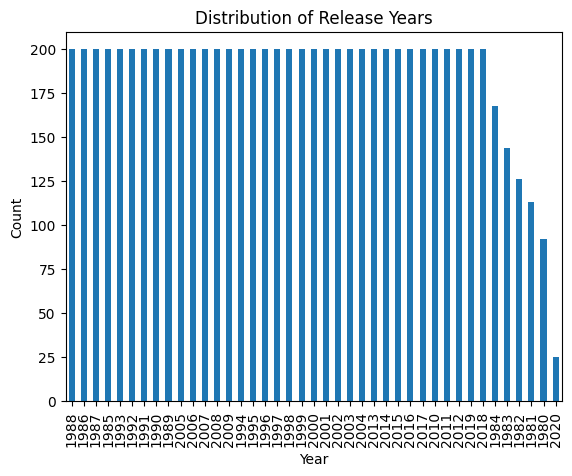

In [20]:
#The number of movies released each year
release_year_counts = movies_data['year'].value_counts()

# Bar graph to show distribution of movie releases in years
release_year_counts.plot(kind='bar', title='Distribution of Release Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

 Observations from the bar graph

- The number of movies released per year appears relatively consistent from 1980 to 2010..
-  A noticeable decrease in the number of movies released is evident from 2011 onwards, with a significant drop in 2020.


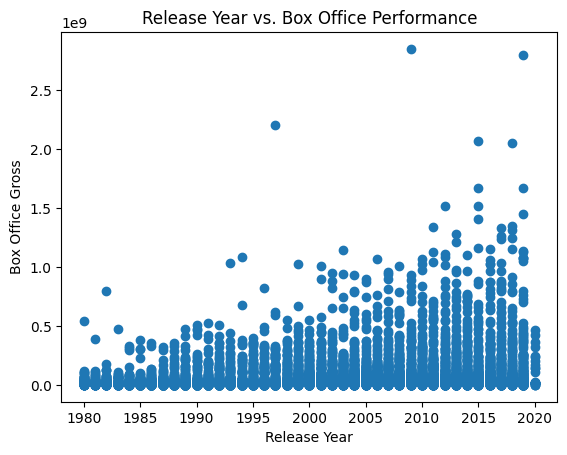

In [24]:
# scatter plot to show release year and box performance
figsize = (10, 6)
plt.scatter(movies_data['year'], movies_data['gross'])
plt.title('Release Year vs. Box Office Performance')
plt.xlabel('Release Year')
plt.ylabel('Box Office Gross')
plt.show()

 Observations from the scatter plot
 - There appears to be a steady upward trend, meaning that movies released in later years tend to have higher box office grosses.
 - There are several outliers,especially in the higher box office gross range, indicating that some movies released in earlier years were really successful.
 - The data points tend to be congested in certain areas, suggesting that factors other than release year might influence box office performance.


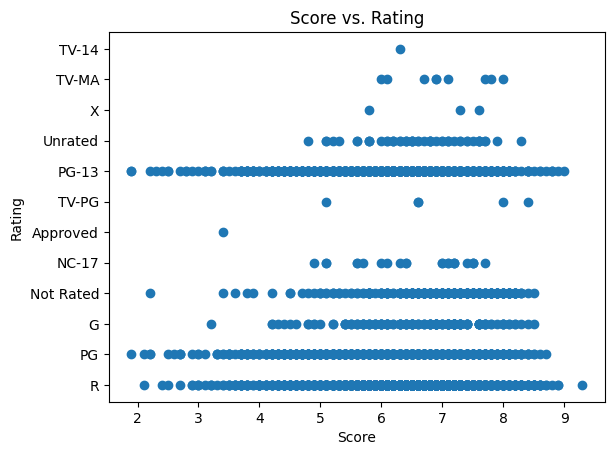

In [27]:
#Scatter plot of score against movie rating
plt.scatter(movies_data['score'], movies_data['rating'])
plt.title('Score vs. Rating')
plt.xlabel('Score')
plt.ylabel('Rating')
plt.show()

Observations from the scatterplot
 - The ratings are distributed across a range of values, with some clustering around specific rating categories like PG-13 and TV-PG.
 T- he scores are relatively concentrated between 5 and 8, with fewer data points outside this range.
 - A few outliers can also be observed, particularly in the lower rating categories like NC-17 and R.